## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataSet = pd.read_csv('data/nUsersCreditCardTxs.csv')

In [3]:
dataSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Notice that the variables are PCA transformed. Due to confidentiality issues the data set available online isn't having the actual feature names. Only Time and Amount are readable ones. While Amount is the total transaction amount, the Time column is the number of seconds elapsed between the transaction in consideration and the very first transaction of the dataset. 



In [4]:
dataSet.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data is clean as there aren't any null values

#### Data set limitation

In [5]:
dataSet['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class with value 1 indicate fradulent transaction and Class with value 0 indicate a legitimate transaction. 
The data set has only 492 fradulent transaction which is 0.17% of the data set. This is a very imbalanced data set.

## Data Visualization

### Correlation

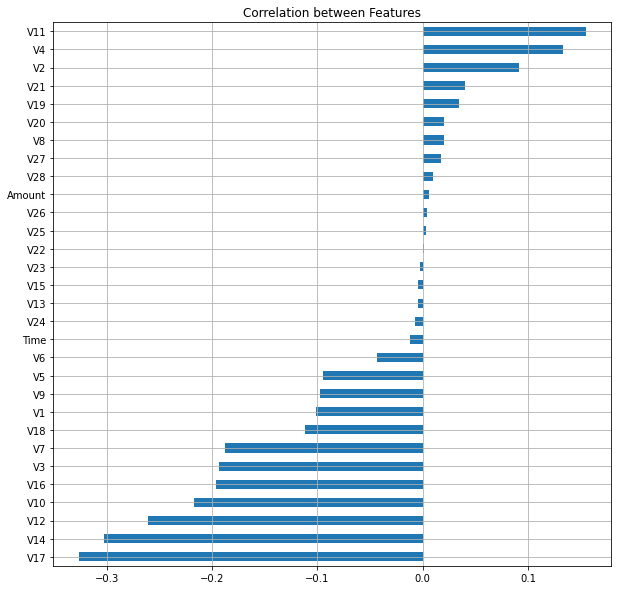

In [6]:
plt.figure(figsize=(10,10))
corr = dataSet.corr()['Class'].sort_values().drop('Class')
corr.plot(kind='barh')
plt.title('Correlation between Features')
plt.grid(True)
plt.show()

## Separating the data into featured and dependent variable

In [7]:
df = dataSet[dataSet['Class'] == 1]
df1 = dataSet[dataSet['Class']== 0]
df1.drop(df1.index[2000: ],0,inplace=True)
nUsersCreditCardTxs = pd.concat([df, df1], axis=0)


In [8]:
xfeatures = ['V11','V4','V10','V12','V14','V17']

x = nUsersCreditCardTxs[xfeatures]
y = nUsersCreditCardTxs['Class']


In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, stratify=y, random_state=24)

In [10]:
from sklearn.preprocessing import StandardScaler

standardScaler=StandardScaler()
x_train=standardScaler.fit_transform(x_train)
x_test=standardScaler.transform(x_test)

## Model building

## Model 1 -  Dense + Batch normalization

In [11]:
#pip install tensorflow

In [12]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization

In [13]:
dBnModel = models.Sequential()

dBnModel.add(layers.Dense(30, activation='relu', input_dim = x_train.shape[1]))
layers.Dropout(0.5)
dBnModel.add(BatchNormalization())
dBnModel.add(layers.Dense(15, activation='relu'))
layers.Dropout(0.5)
dBnModel.add(BatchNormalization())
dBnModel.add(layers.Dense(1, activation='relu'))
layers.Dropout(0.5)
dBnModel.add(BatchNormalization())


In [14]:
dBnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
 batch_normalization_2 (Batc  (None, 1)                4

In [15]:
dBnModel.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(monitor = "val_loss",
                           mode = "auto",
                           verbose = 1,
                           patience = 5, restore_best_weights = True)

In [17]:
dBnModel.fit(x = x_train, y = y_train, validation_split = 0.1, batch_size = 32, 
             epochs = 50, callbacks = [earlyStop], verbose = 1)

Epoch 1/50
57/57 [==============================] - 1s 5ms/step - loss: 3.8761 - accuracy: 0.6799 - val_loss: 1.7417 - val_accuracy: 0.8350
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.9315 - accuracy: 0.9063 - val_loss: 1.0748 - val_accuracy: 0.9100
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.9320 - val_loss: 0.5745 - val_accuracy: 0.9100
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.9398 - val_loss: 0.4676 - val_accuracy: 0.9250
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.9414 - val_loss: 0.3666 - val_accuracy: 0.9550
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.9403 - val_loss: 0.3506 - val_accuracy: 0.9650
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.9453 - val_loss: 0.3428 - val_accuracy: 0.9700
Epoch 8/50
57/57 [==

In [18]:
accuracyLossDataF = pd.DataFrame(dBnModel.history.history)
accuracyLossDataF.head()

,loss,accuracy,val_loss,val_accuracy
0,3.876082,0.679866,1.741697,0.835
1,0.931456,0.906302,1.074842,0.910
2,0.477242,0.931958,0.574493,0.910
3,0.428165,0.939766,0.467647,0.925
4,0.444295,0.941439,0.366602,0.955


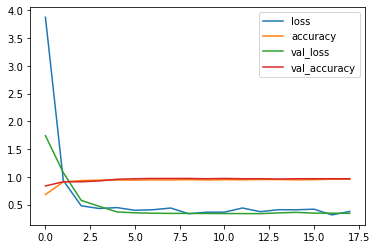

In [19]:
accuracyLossDataF.plot();

In [20]:
lossDBn, accuracyDBn = dBnModel.evaluate(x_test, y_test, verbose=0)
print(f"Loss is {lossDBn} ")
print(f"Accuracy is {accuracyDBn} " )

Loss is 0.473082959651947 
Accuracy is 0.9498997926712036 


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (dBnModel.predict(x_test)  > 0.5).astype("int32")

print("Confusion matrix -- ")
print(confusion_matrix(y_test, y_pred))

print("Classification report -- ")
print(classification_report(y_test, y_pred))

16/16 [==============================] - 0s 732us/step
Confusion matrix -- 
[[393   7]
 [ 18  81]]
Classification report -- 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       400
           1       0.92      0.82      0.87        99

    accuracy                           0.95       499
   macro avg       0.94      0.90      0.92       499
weighted avg       0.95      0.95      0.95       499

